# HW 14 - Astropy
ULAB - Physics and Astronomy Division \
Due **Sunday, March 1st, 2025 at 11:59pm** on Gradescope

## 1 Unit Conversion
Import the astropy module `units` as `u` in the cell below.

In [3]:
from astropy import units as u

Convert a speed of **60 km/h** to **m/s**. \
\
Round your answer to two significant digits. *Hint: With an f-string, you can use `:.3f`, like `print(f"{speed_mps:.3f}")`*.

In [5]:
speed = 60 * u.kilometer / u.hour
speed = speed.to(u.meter/u.second)
print(f"{speed:.2f}")

16.67 m / s


## 2 Time Manipulation
Define **Julian Date** in the cell below.

In [7]:
# Julian date is a continuous count of days starting from noon universal time on January 1, 4713 BC.

What's the difference between the **Julian calendar** and the **Gregorian calendar**?

In [9]:
# The Julian Calender has a year of 365 days and 6 hours whereas the gregorian calender has a year of 365 days 5 hours and 49 minutes.

From the astropy module `time` import `Time` in the cell below.

In [11]:
from astropy.time import Time

Find the Julian Date for **the current time**. 

In [13]:
now = Time.now()
print(now.jd)

2460737.2545168507


Convert `1969-07-02 20:17:00` to its **Julian Date**.

In [15]:
time = Time("1969-07-02 20:17:00")
print(time.jd)

2440405.345138889


What historically happened at this date and time?

In [17]:
# The soviet N1 rocket failed to launch.

## 3 Coordinate Transformations
From the astropy module `coordinates` import `SkyCoord`, `Galactic`, `AltAz` and `EarthLocation` in the cell below.

In [19]:
from astropy.coordinates import SkyCoord, Galactic, AltAz, EarthLocation

Define a celestial object at **RA = 15 degrees** and **DEC = -20 degrees** in ICRS. Use the astropy `Time` module.

In [21]:
ra = 15 * u.degree
dec = -20 * u.degree
frame = 'icrs'
target_icrs = SkyCoord(ra=ra, dec=dec, frame=frame)

Convert the object's coordinates from ICSRS to **Galactic**.

In [23]:
target_galactic = target_icrs.transform_to(Galactic())

Convert the object's coordinate from ICRS to **AltAz**. For AltAz frame, use the location of **Campbell Hall**.

In [25]:
campbell_hall = EarthLocation(lat=37.87*u.deg, lon=-122.25*u.deg)
altaz_frame = AltAz(location = campbell_hall, obstime = Time.now())
altaz_coord = target_icrs.transform_to(altaz_frame)

## 4 FITS Files
From the astropy module `astropy.io` import `fits` in the cell below.

In [27]:
from astropy.io import fits

From the astropy module `astropy.utils.data` import `download_file`.

In [29]:
from astropy.utils.data import download_file

Import `numpy` in the cell below.

In [31]:
import numpy as np

Use the `download_file` astropy function to create a variable for the location of the `.fits` file from class.

In [33]:
image_file = download_file('http://data.astropy.org/tutorials/FITS-images/HorseHead.fits', cache=True)

Follow the procedure from lecture to open the `.fits` files in the cell below. Make sure to use the `hdul` format, while calling `hdul.info`, `hdul[0]` and `hdul[1]` appropriately.

In [35]:
with fits.open(image_file) as hdul:
    hdul.info()
    data = hdul[0].data
    header = hdul[0].header

print(header)

Filename: C:\Users\nikol\.astropy\cache\download\url\ff6e0b93871033c68022ca026a956d87\contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   
SIMPLE  =                    T /FITS: Compliance                                BITPIX  =                   16 /FITS: I*2 Data                                  NAXIS   =                    2 /FITS: 2-D Image Data                            NAXIS1  =                  891 /FITS: X Dimension                               NAXIS2  =                  893 /FITS: Y Dimension                               EXTEND  =                    T /FITS: File can contain extensions               DATE    = '2014-01-09        '  /FITS: Creation Date                            ORIGIN  = 'STScI/MAST'         /GSSS: STScI Digitized Sky Survey                SURVEY  = 'SERC-ER '           /GSSS: Sky Survey        

With the `np.max` function, find the brightest pixel in the image. Print its value in the cell below.

In [37]:
print(np.max(data))

22918


With the `np.min` function, find the least brightest pixel in the image. Print its value in the cell below.

In [39]:
print(np.min(data))

3759


## Tables
From the astropy module `astropy.table` import `Table`.

In [41]:
from astropy.table import Table

Make an astropy table with **three** actual stars (so you will need to use google for this part). Include the `name`, `magnitude` and `spectral type`.

In [43]:
stars = Table(
    names=['name', 'magnitude', 'spectral_type'], 
    rows=[('Aldebaran', 0.8, 'K5III'),
          ('Altair', 0.77, 'A7V'),
          ('Rigel', 0.12, 'B8Iab')]
)

Save the table as a `.fits` file. *Hint: Use the function `.write` with the argument `format='fits'`.*

In [55]:
stars.write('stars.fits', format='fits', overwrite = True)

Read and print the table in the cell below from the `.fits` file you made.

In [57]:
stars_read = Table.read('stars.fits')
print(stars_read)

   name   magnitude spectral_type
--------- --------- -------------
Aldebaran       0.8         K5III
   Altair      0.77           A7V
    Rigel      0.12         B8Iab


## 6 Advanced... but awesome!
With the Hipparcos catalog, construct a Hertzsprung-Russell (H-R) diagram. Overall you will do the following:
* Download and clean the stellar data from the Hipparcos catalog.
* Calculate the absolute magnitude of the stars.
* Convert and classify spectral types.
* Plot an H-R diagram using both spectral class and color-index (B-V).

In the cell below, define what an **H-R** diagram is.

In [59]:
# A graph plotting a stars luminosity vs its surface temperature.

### 6.1 Download and Load in the Hipparcos Catalog
The catalog you are downloading contains accurate parallax measurements which will help us determine the **absolute magnitude** of stars. 
* **Absolute mangitude** = the actual brightness of a star
* **Apparent magnitude** = how bright the star appears to us on Earth

Import `pandas` in the cell below.

In [61]:
import pandas as pd

In the cell below import the file `cluster_data.csv` as a pandas dataframe. Add the following arguments:
* skiprows=44
* sep=';'
* header=None
* index_col=0
* names = ['HIP', 'Vmag', 'Plx', 'B-V', 'SpType']
* skipfooter=1
* engine='python'

In [63]:
df = pd.read_csv('cluster_data.csv', skiprows=44, sep=';', header=None, index_col=0, names = ['HIP', 'Vmag', 'Plx', 'B-V', 'SpType'], skipfooter=1, engine = 'python')

Display the first few rows of the data.

In [65]:
print(df)

         Vmag      Plx     B-V SpType
HIP                                  
10       8.59    10.76   0.489    F6V
11       7.34     4.29   0.081     A2
12       8.43     4.06   1.484  K4III
13       8.80     3.49   1.128  K0III
14       7.25     5.11   1.200     K0
...       ...      ...     ...    ...
118318   6.99     1.92   1.595     K2
118319   8.23    10.63   0.639    G2V
118320   7.59     5.00   0.999     K0
118321   9.20    19.22   0.698    G5V
118322   4.49     8.71  -0.075   B9IV

[118209 rows x 4 columns]


### 6.2 Clean the Data
Some of the rows in the data contain **missing** or **invalid** values so we need to "clean" our data. We will start by replacing the **blank spaces with NaN**, run the cell below.

In [67]:
df_clean = df.applymap(lambda x: np.nan if isinstance(x, str) and x.isspace() else x)

C:\Users\nikol\AppData\Local\Temp\ipykernel_21388\395354793.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clean = df.applymap(lambda x: np.nan if isinstance(x, str) and x.isspace() else x)


Drop the rows with missing (NaN) values. *Hint: Use the `.dropna()` function`.

In [70]:
df_clean = df_clean.dropna()

Run the cell below. We are converting the datatypes in the columns to floats.

In [73]:
df_clean[['Vmag', 'Plx', 'B-V']] = df_clean[['Vmag', 'Plx', 'B-V']].astype(float)

# Display dataset summary
print(df_clean.describe())

                Vmag            Plx            B-V
count  114463.000000  114463.000000  114463.000000
mean        8.297699       7.104872       0.702415
std         1.248614      11.064009       0.490235
min        -1.440000     -35.100000      -0.400000
25%         7.610000       2.520000       0.341000
50%         8.400000       4.580000       0.605000
75%         9.070000       8.260000       1.075000
max        13.610000     772.330000       5.460000


### 6.3 Compute Absolute Magnitude
The absolute magnitude ($M_V$) of a star is given by:

$$
M_V = V_{\text{mag}} + 5 \cdot \log_{10}\left(\frac{\text{Plx}}{100}\right)
$$

Run the cell below.

In [76]:
df_clean['M_V'] = df_clean['Vmag'] + 5 * np.log10(df_clean['Plx'] / 100)
print(df_clean[['Vmag', 'Plx', 'M_V']].head())

     Vmag    Plx       M_V
HIP                       
10   8.59  10.76  3.749061
11   7.34   4.29  0.502286
12   8.43   4.06  1.472630
13   8.80   3.49  1.514127
14   7.25   5.11  0.792105


C:\Users\nikol\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\nikol\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Describe what the cell above is doing. 

In [79]:
# The cell above is taking in the Vmag and Plx to compute the absolute magnitude of the given stars.

### 6.4 Process the Spectral Types
Stars are defined by their spectral types:
* The first letter (O, B, A, F, G, K, M) indicates the **temperature** of a star.
* The digit (0-9) refines the **classification**.

Now we will extract the first two characters for sorting purposes. Run the cell below.

In [82]:
# Extract the first two characters (e.g., 'G2', 'K3')
df_clean['SpType2'] = df_clean['SpType'].str[:2]

# Keep only valid spectral classes
df_clean = df_clean[df_clean['SpType2'].str.match(r'^[OBAFGKM][0-9]')]

# Display unique spectral types
print(df_clean['SpType2'].unique())

['F6' 'A2' 'K4' 'K0' 'K2' 'F3' 'K5' 'G5' 'G0' 'G8' 'F2' 'G3' 'F7' 'A0'
 'B8' 'F0' 'G6' 'G9' 'K1' 'K3' 'F5' 'G1' 'A4' 'G2' 'B5' 'B9' 'M0' 'F8'
 'M1' 'G7' 'M2' 'B0' 'B7' 'A9' 'M3' 'A3' 'O7' 'A1' 'B4' 'A6' 'B3' 'B2'
 'A5' 'M4' 'A7' 'O8' 'M5' 'G4' 'K7' 'B1' 'O6' 'M6' 'F4' 'A8' 'K8' 'M7'
 'B6' 'O9' 'F9' 'M8' 'M9' 'K9' 'O5' 'F1' 'K6' 'O4']


What letter represents the **hottest** stars? What letter represents the **coldest** stars?

In [85]:
# O represents the hottest stars, and M represents the coldest stars.

### 6.5 Plot the H-R Diagram(s)
Conver the spectral types into sortable numerical categories. Run the cell below.

In [88]:
order = {'O': 0, 'B': 1, 'A': 2, 'F': 3, 'G': 4, 'K': 5, 'M': 6}
df_clean['SpType2_numeric'] = df_clean['SpType2'].apply(lambda x: order[x[0]]*10 + int(x[1]))

Import `matplotlib.pyplot` in the cell below.

In [91]:
import matplotlib.pyplot as plt

**Spectral Type vs. Absolute Magnitude** \
Scatter the `df_clean['SpType2_numeric']` on the x-axis and the `df_clean['M_V']` on the y-axis. Add the following features:
* In the `plt.scatter` function, give arguments of: `s=5`, `alpha=0.3` and `c='k'`.
* Set a `xlim` of `(0, 70).
* Set a `ylim` of `(15, -10).
* Call `xticklabels(['O', 'B', 'A', 'F', 'G', 'K', 'M'])`.
* Call `xticks(range(5,75,10))`.
* Title the x-axis `'Spectral Type'`.
* Title the y-axis `Absolute Magnitude`.
* Give a title of `H-R Diagram (Hipparcos catalog)`.

Text(0.5, 1.0, 'H-R Diagram (Hipparcos catalog)')

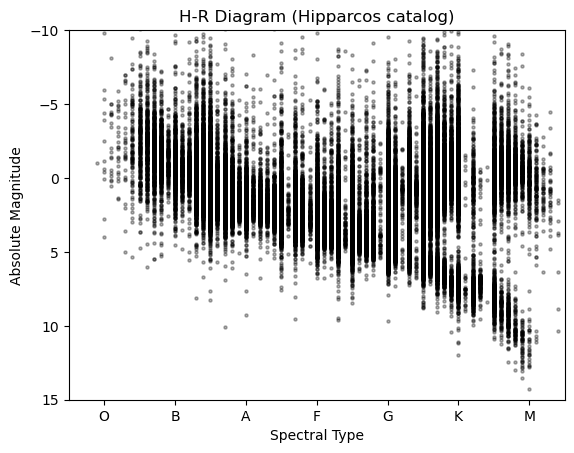

In [100]:
plt.scatter(df_clean['SpType2_numeric'], df_clean['M_V'], s=5, alpha=0.3, c='k')
plt.xlim(0,70)
plt.ylim(15,-10)
plt.xticks(ticks=range(5, 75, 10), labels=['O', 'B', 'A', 'F', 'G', 'K', 'M'])
plt.xlabel('Spectral Type')
plt.ylabel('Absolute Magnitude')
plt.title('H-R Diagram (Hipparcos catalog)')

**Color Index (B-V) vs. Absolute Magnitude** \
Scatter the `df_clean['B-V']` on the x-axis and the `df_clean['M_V']` on the y-axis. Add the following features:
* In the `plt.scatter` function, give arguments of: `s=5`, `alpha=0.3` and `c='k'`.
* Set a `xlim` of `(-0.5, 2.5).
* Set a `ylim` of `(15, -10).
* Title the x-axis `'Color Index (B-V)'`.
* Title the y-axis `Absolute Magnitude`.
* Give a title of `H-R Diagram (Hipparcos catalog)`.

Text(0.5, 1.0, 'H-R Diagram (Hipparcos catalog)')

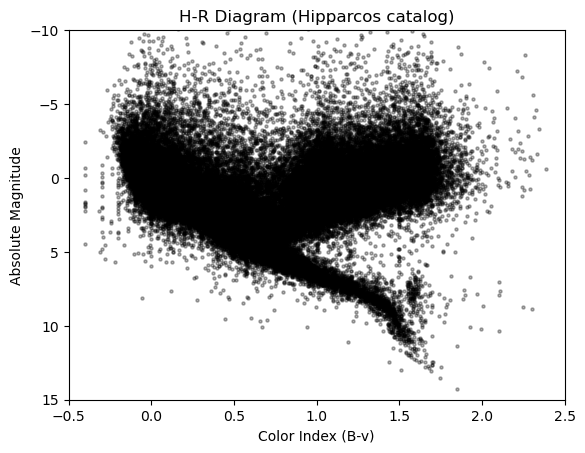

In [104]:
plt.scatter(df_clean['B-V'], df_clean['M_V'], s = 5, alpha = 0.3, c = 'k')
plt.xlim(-0.5, 2.5)
plt.ylim(15, -10)
plt.xlabel('Color Index (B-v)')
plt.ylabel('Absolute Magnitude')
plt.title('H-R Diagram (Hipparcos catalog)')

### 6.6 Highlight Luminosity Classes
Great! Finally, we want to difference between our three main luminosity classes:
* Main Sequence (V), aka what our sun is
* Giants (III)
* Supergiants(I)

Run the cell below.

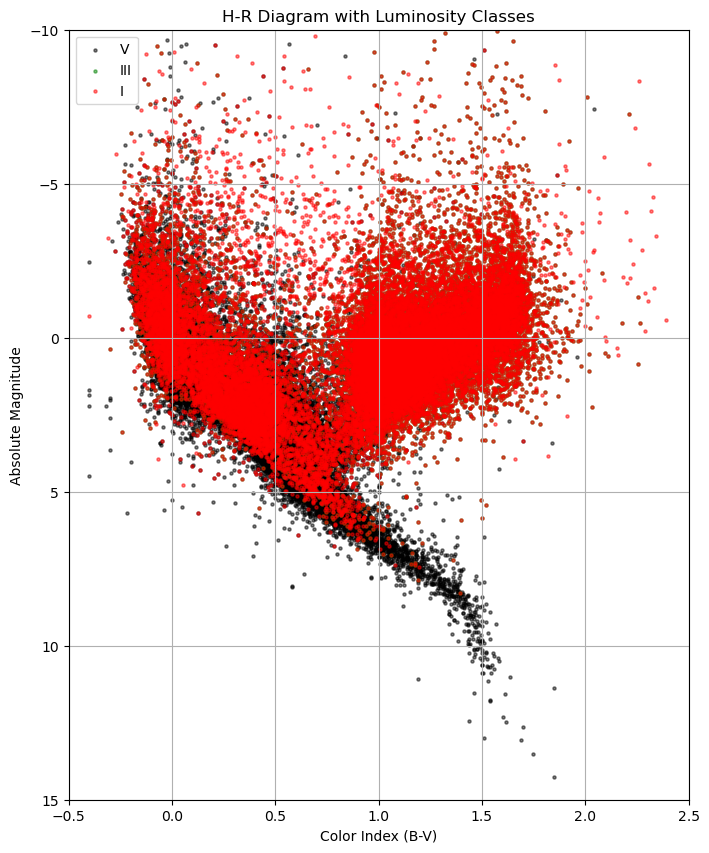

In [106]:
def plot_luminosity_class(df, label, color):
    mask = df['SpType'].str.contains(label, na=False)
    plt.scatter(df[mask]['B-V'], df[mask]['M_V'], s=5, label=label, c=color, alpha=0.5)

plt.figure(figsize=(8,10))
plt.grid()
plt.xlim(-0.5, 2.5)
plt.ylim(15, -10)
plt.xlabel('Color Index (B-V)')
plt.ylabel('Absolute Magnitude')
plt.title('H-R Diagram with Luminosity Classes')

plot_luminosity_class(df_clean, 'V', 'black')  # Main Sequence
plot_luminosity_class(df_clean, 'III', 'green')  # Giants
plot_luminosity_class(df_clean, 'I', 'red')  # Supergiants

plt.legend()
plt.show()


With the example above, now plot the following types **WITH** and then **WITHOUT** the ones above:
* Subdwarfs (VI)
* White dwarfs (VII)
* Subgiants (IV)
* Bright giants (II)

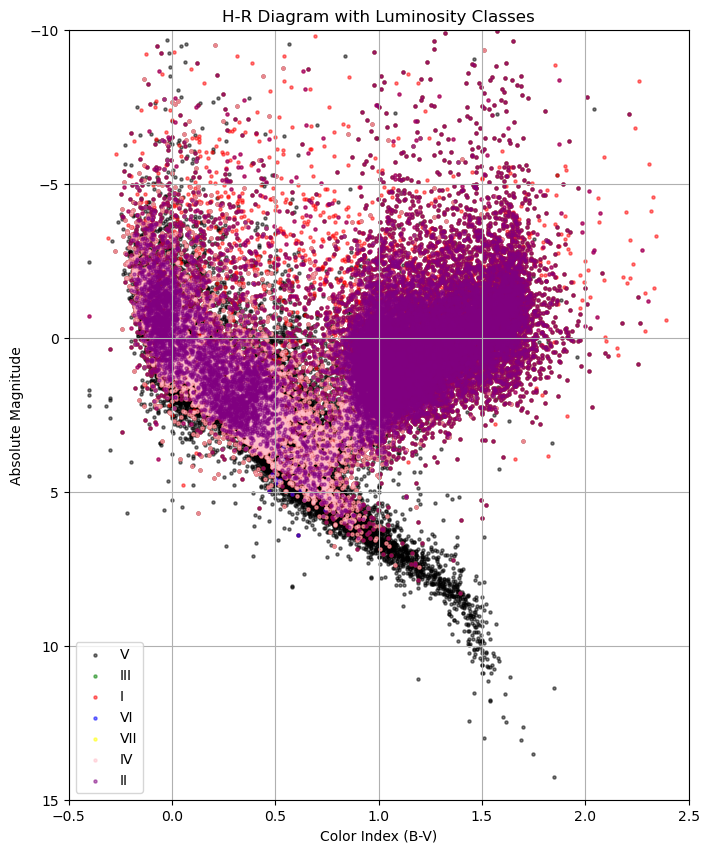

In [110]:
plt.figure(figsize=(8,10))
plt.grid()
plt.xlim(-0.5, 2.5)
plt.ylim(15, -10)
plt.xlabel('Color Index (B-V)')
plt.ylabel('Absolute Magnitude')
plt.title('H-R Diagram with Luminosity Classes')

plot_luminosity_class(df_clean, 'V', 'black')  # Main Sequence
plot_luminosity_class(df_clean, 'III', 'green')  # Giants
plot_luminosity_class(df_clean, 'I', 'red')  # Supergiants
plot_luminosity_class(df_clean, 'VI', 'blue')
plot_luminosity_class(df_clean, 'VII', 'yellow')
plot_luminosity_class(df_clean, 'IV', 'pink')
plot_luminosity_class(df_clean, 'II', 'purple')

plt.legend()
plt.show()

Submit your FITS file and this notebook to Gradescope!